# Import relevant packages

In [53]:
from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
file_path = "/content/drive/MyDrive/BA"

In [55]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
import re
import itertools
from collections import Counter
import collections as collect

In [56]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment import vader

In [57]:
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [58]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Import data and conduct some exploratory analysis

In [59]:
# load full data set
full_data = pd.read_csv(file_path + '/Datasets/BA_reviews.csv')

In [60]:
full_data.shape

(3453, 2)

In [61]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3453 non-null   int64 
 1   reviews     3453 non-null   object
dtypes: int64(1), object(1)
memory usage: 54.1+ KB


In [62]:
full_data.head()

,Unnamed: 0,reviews
0,0,Not Verified | Great thing about British Airw...
1,1,Not Verified | The staff are friendly. The pla...
2,2,✅ Trip Verified | Probably the worst business ...
3,3,"✅ Trip Verified | Definitely not recommended, ..."
4,4,✅ Trip Verified | BA shuttle service across t...


In [63]:
full_data.tail()

,Unnamed: 0,reviews
3448,3448,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
3449,3449,LHR to HAM. Purser addresses all club passenge...
3450,3450,My son who had worked for British Airways urge...
3451,3451,London City-New York JFK via Shannon on A318 b...
3452,3452,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [64]:
del full_data['Unnamed: 0']
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3453 non-null   object
dtypes: object(1)
memory usage: 27.1+ KB


In [65]:
full_data.describe()

,reviews
count,3453
unique,3439
top,Flew LHR-MIA in WT+. Seats 13E and 13F on 747....
freq,2


Stopwords

In [66]:
# RAKE stopwords directory
# A list of stopwords to augment the NLTK stopwords
stop_dir = file_path + "/Datasets/SmartStoplist.txt"

# store the set of english stopwords from nltk as a variable to be used later
stop_words = set(stopwords.words('english'))


# create sets of certain words to remove
# this includes ertain words that appear 
# frequently in the reviews but don't have much to do with the meaning behind the document

specific_stopwords =stop_dir + str(stop_words) + 'ba'+'verified'+'trip'+ 'british'+ 'airway'+ 'airways'+ 'airline'+ 'airlines' +'review'+'airport'+ 'also' 

# Data Cleaning & Preprocessing

In [67]:
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
  review = re.sub(re.compile('#:_\!/<.*?>'), '', review)  
  review =  re.sub('[^A-Za-z0-9\n\s]+', ' ', review)  
  
  # lowercase
  review = review.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
  review = [word for word in tokens if word not in specific_stopwords and word not in specific_stopwords and len(word) > 3] #removing stop words

  
  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
  review = ' '.join(review)
  
  return review

In [68]:
full_data['reviews'] = full_data['reviews'].apply(lambda review: data_preprocessing(review))
full_data.head()

,reviews
0,great thing a380 economy section upstairs allo...
1,staff friendly plane cold shivering gave light...
2,probably worst business class experience ever ...
3,definitely recommended especially business cla...
4,shuttle service across still surprisingly good...


In [69]:
full_data.shape

(3453, 1)

In [70]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3453 non-null   object
dtypes: object(1)
memory usage: 27.1+ KB


 # Simple Exploratory Analysis

Get Count of Most Used Words and Word Cloud

In [71]:
# Function to get word frequency count
def WordFreq(df_column, num_words):
  results = Counter()

  df_column.str.lower().str.split().apply(results.update)


  df_word_count = pd.DataFrame(results.most_common(num_words), columns = ['words', 'count'])

  return df_word_count

In [72]:
ReviewsFrequency = WordFreq(full_data['reviews'],20)

In [73]:
print(ReviewsFrequency)

#british, airway, airways, airline, review,airport, are words that will not affect the analysis and should be removed with stopwords

        words  count
0      flight   7287
1        seat   4288
2     service   2781
3        food   2275
4        time   2272
5      london   2138
6        crew   2103
7        good   2002
8       cabin   1978
9       class   1823
10       hour   1708
11   business   1499
12      staff   1483
13   heathrow   1455
14    economy   1364
15  passenger   1229
16      first   1213
17      check   1212
18      drink   1169
19       meal   1122


Bar Chart of most popular words in the reviews

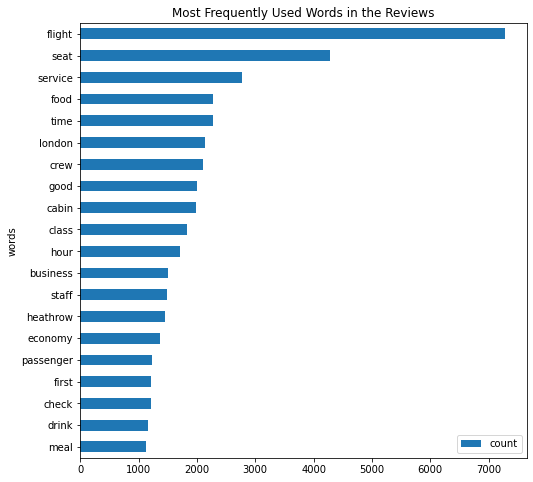

In [74]:
#@title
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
ReviewsFrequency.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax)

ax.set_title("Most Frequently Used Words in the Reviews")

# plt.show()
plt.savefig(file_path + "/Output_Files/WordFreq.png", format="png", dpi=800)

Wordcloud of most popular words in the reviews

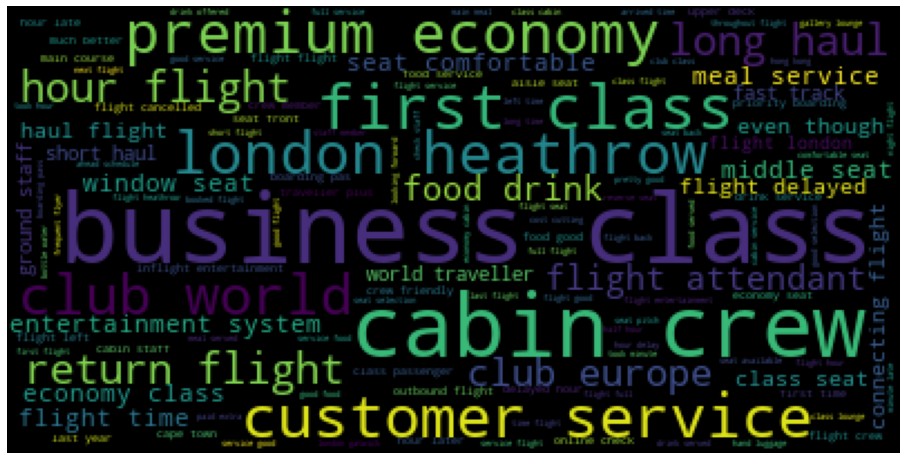

In [75]:


tplot = ''
for cat in full_data['reviews']:
  cat = str(cat)
  tokens = cat.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    tplot += " ".join(tokens)

word_cloud = WordCloud(collocations = False, 
                       width=1440, height = 900,
                       background_color = 'white').generate(tplot)



plt.figure(figsize=(16, 16), facecolor = None)
plt.imshow(WordCloud().generate(tplot))
plt.axis('off')
# plt.show()



word_cloud.to_file(file_path + "/Output_Files/BA_WordCloud.png")

# BERTopic for topic modelling 

This section is more of an appendix to the work but aims at using a topic modelling method to extract some more information from the data.

The code will be commented out for that reason but the results will be left in the notebook.

In [76]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
from bertopic import BERTopic

In [78]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from umap import UMAP

In [80]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(full_data['reviews'])

In [81]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1717,-1_flight_seat_london_service
1,0,270,0_a380_good_crew_flight
2,1,176,1_heathrow_good_seat_a380
3,2,136,2_heathrow_service_flight_london
4,3,112,3_gatwick_lounge_flight_drink
5,4,98,4_class_business_seat_economy
6,5,87,5_refund_voucher_cancelled_customer
7,6,85,6_first_seat_lounge_crew
8,7,68,7_europe_club_seat_good
9,8,61,8_bangkok_meal_screen_london


Topic -1 should be ignored. It indicates that the reviews are not assigned to any specific topic. The count for topic -1 is 1839, meaning that there are 1839 reviews as outliers that do not belong to any topic.

The `Name` column lists the top terms for each topic. For example, the top 4 terms for Topic 0 are heathrow, good, london, seat, indicating that it is a topic related to a flight either to or from london heathrow airport where the customer made a comment about the seat quality.

In [82]:
topic_model.get_topic(0)

[('a380', 0.021788592280044667),
 ('good', 0.021677981703430733),
 ('crew', 0.020908211755606063),
 ('flight', 0.019496522418508796),
 ('cabin', 0.01910511167477625),
 ('seat', 0.018215454455888815),
 ('food', 0.01694122186229404),
 ('aircraft', 0.016364323621892614),
 ('service', 0.014832057923417418),
 ('comfortable', 0.014589053758801627)]

If more than 4 terms are needed for a topic, we can use get_topic and pass in the topic number.




# BERTopic Visualisations

We will use three visualizations to study how the topics are related to each other. The three methods are intertopic distance map, the hierarchical clustering of topics, and the topic similarity matrix.

We can visualize the top keywords using a bar chart. top_n_topics=12 means that we will create bar charts for the top 12 topics. The length of the bar represents the score of the keyword. A longer bar means higher importance for the topic.

In [83]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

Another view for keyword importance is the “Term score decline per topic” chart. It’s a line chart with the term rank being the x-axis and the c-TF-IDF score on the y-axis.

There are quite a number of lines, one line for each topic. Hovering over the line shows the term score information.

In [84]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

The Intertopic distance map measures the distance between topics by clustering similar topics. Topics closer to each other and very different topics are far from each other. From the visualization, we can see that there are about 6 main topic groups for all the topics. Topics with similar semantic meanings are in the same topic group.

The size of the circle represents the number of documents in the topics, and larger circles mean that more reviews belong to the topic.

In [85]:
# Visualize intertopic distance
topic_model.visualize_topics(top_n_topics = 10)

Another way to see how the topics are connected is through a hierarchical clustering graph. We can control the number of topics in the graph by the top_n_topics parameter.

In this example, the top 20 topics are included in the hierarchical graph. 

In [86]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=20)

Just looking at the red ones for instance, we observe that 9, 16, and 11 all seem to have something to do with aircraft comfort.

This diagram is able to show the hierarchies in that manner.

Heatmaps can also be used to analyze the similarities between topics. The similarity score ranges from 0 to 1. A value close to 1 represents a higher similarity between the two topics, which is represented by darker blue color.

In [87]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap(top_n_topics=10)

# Analysis of Sentiments

TextBlob Sentiment Analysis

In [88]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
    
  #Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

   # Create two new columns 'Subjectivity' & 'Polarity'
full_data['Subjectivity'] =    full_data['reviews'].apply(getSubjectivity)
full_data['Polarity'] = full_data['reviews'].apply(getPolarity)
full_data ['Analysis'] = full_data['Polarity'].apply(getAnalysis)


  

In [89]:
full_data

,reviews,Subjectivity,Polarity,Analysis
0,great thing a380 economy section upstairs allo...,0.497792,0.031019,Positive
1,staff friendly plane cold shivering gave light...,0.475926,-0.073148,Negative
2,probably worst business class experience ever ...,0.469246,-0.104620,Negative
3,definitely recommended especially business cla...,0.593627,-0.037255,Negative
4,shuttle service across still surprisingly good...,0.472222,0.322222,Positive
...,...,...,...,...
3448,boeing much written tired fleet annoying row f...,0.600000,0.250000,Positive
3449,purser address club passenger name boarding li...,0.428571,0.173214,Positive
3450,worked urged kansa city recommended join execu...,0.246154,0.078205,Positive
3451,london city york shannon a318 really nice seat...,0.440000,0.340000,Positive


In [90]:
full_data['Analysis'].describe()

count         3453
unique           3
top       Positive
freq          2396
Name: Analysis, dtype: object

In [91]:
text_blob_list = []
for i in range(len(full_data)):

  text_blob_list.append(full_data['Analysis'][i])

full_data['tBlob'] = text_blob_list

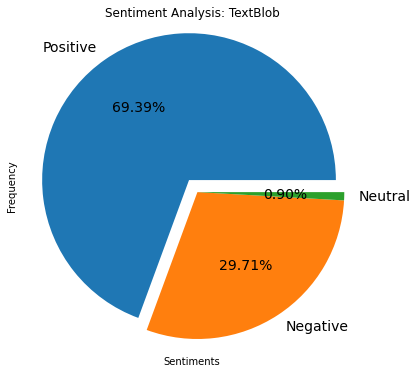

In [92]:
# get summary dictionary for sentiment 

blob_summary = dict(Counter(text_blob_list))


fig, ax = plt.subplots()

ax.pie( blob_summary.values(), 
       labels = blob_summary.keys(), 
       explode = (0.1,0,0), 
       autopct='%0.2f%%',
       textprops = {"fontsize":14},
      #  shadow = True
       )

# change the width and length of plot 
fig.set_figwidth(6)
fig.set_figheight(6)
fig.set_label

ax.axis('equal')

# label the plot 
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
plt.title("Sentiment Analysis: TextBlob")
plt.savefig(file_path + "/Output_Files/TextBlobPieAnalysis.png", format="png", dpi=800)
# plt.show()

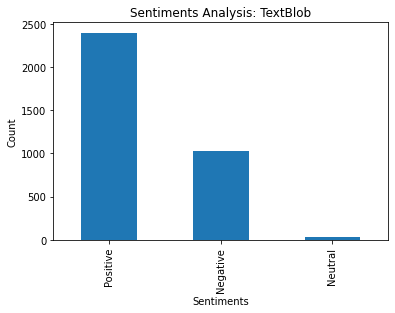

In [93]:
#show the value counts
full_data['Analysis'].value_counts()

plt.title('Sentiments Analysis: TextBlob')
plt.xlabel('Sentiments')
plt.ylabel('Count')

full_data['Analysis'].value_counts().plot(kind = 'bar')
# plt.show()
plt.savefig(file_path + "/Output_Files/TextBlobBarAnalysis.png", format="png", dpi=800)


VADER Sentiment Analysis

In [94]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
full_data['Vader Analysis'] = full_data['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
full_data

,reviews,Subjectivity,Polarity,Analysis,tBlob,Vader Analysis
0,great thing a380 economy section upstairs allo...,0.497792,0.031019,Positive,Positive,0.9101
1,staff friendly plane cold shivering gave light...,0.475926,-0.073148,Negative,Negative,0.5994
2,probably worst business class experience ever ...,0.469246,-0.104620,Negative,Negative,-0.9872
3,definitely recommended especially business cla...,0.593627,-0.037255,Negative,Negative,0.8225
4,shuttle service across still surprisingly good...,0.472222,0.322222,Positive,Positive,0.9501
...,...,...,...,...,...,...
3448,boeing much written tired fleet annoying row f...,0.600000,0.250000,Positive,Positive,0.8313
3449,purser address club passenger name boarding li...,0.428571,0.173214,Positive,Positive,0.7650
3450,worked urged kansa city recommended join execu...,0.246154,0.078205,Positive,Positive,0.7003
3451,london city york shannon a318 really nice seat...,0.440000,0.340000,Positive,Positive,0.8070


In [95]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
full_data['VaderSentiment'] = full_data['Vader Analysis'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
    )
full_data

,reviews,Subjectivity,Polarity,Analysis,tBlob,Vader Analysis,VaderSentiment
0,great thing a380 economy section upstairs allo...,0.497792,0.031019,Positive,Positive,0.9101,Positive
1,staff friendly plane cold shivering gave light...,0.475926,-0.073148,Negative,Negative,0.5994,Positive
2,probably worst business class experience ever ...,0.469246,-0.104620,Negative,Negative,-0.9872,Negative
3,definitely recommended especially business cla...,0.593627,-0.037255,Negative,Negative,0.8225,Positive
4,shuttle service across still surprisingly good...,0.472222,0.322222,Positive,Positive,0.9501,Positive
...,...,...,...,...,...,...,...
3448,boeing much written tired fleet annoying row f...,0.600000,0.250000,Positive,Positive,0.8313,Positive
3449,purser address club passenger name boarding li...,0.428571,0.173214,Positive,Positive,0.7650,Positive
3450,worked urged kansa city recommended join execu...,0.246154,0.078205,Positive,Positive,0.7003,Positive
3451,london city york shannon a318 really nice seat...,0.440000,0.340000,Positive,Positive,0.8070,Positive


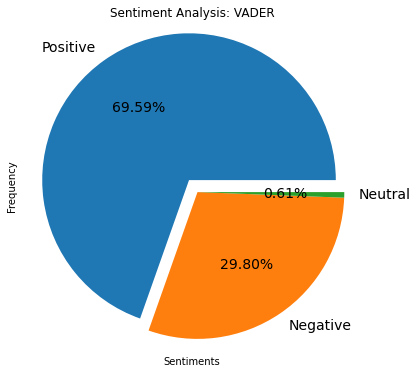

In [96]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = full_data['VaderSentiment'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    # colors=['green', 'purple', 'orange'], 
    explode=[0.1, 0, 0], 
    textprops = {"fontsize":14},
    autopct='%0.2f%%',
    # shadow = True
    )
ax.axis('equal')

fig.set_figwidth(6)
fig.set_figheight(6)



plt.xlabel('Sentiments')
plt.ylabel('Frequency')
plt.title("Sentiment Analysis: VADER")
# plt.show()
plt.savefig(file_path + "/Output_Files/VaderPieAnalysis.png", format="png", dpi=800)

# Extended Analysis

In this section we can view a slightly different type of analysis - analysis of the groups of feelings held by the customers who reviewed the airline. 

The diagrams in this section analyse the customer emotions expressed in the review and not just the most popular words used within the reviews.

In [97]:
import string
def sentiment_clean_text(text):
    if '|' in text:
        text =  text.split('|')[1]   

    text = text.lower()
        
    text = text.translate(str.maketrans('','',string.punctuation))
    
    return text



def emotion_clean_text(text):
   
    text = word_tokenize(text,"english")
    
   
    stop_words = stopwords.words('english')

   
    text_list = []
    
    for word in text:
        if word not in stop_words:
            text_list.append(word)

       
   
    return text_list

In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_analyze(text):
    
    scores = SentimentIntensityAnalyzer().polarity_scores(text) # return dictionary of scores
    
    if (scores['neg'] > scores['pos']):
        
        return 0
    
    else:
        return 1

In [99]:
def emotion_maping (file,di): 
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        di[word] = emotion
            
    return di

In [100]:
# defininqg the required data structures
cleaned_text = ""
temp_emotion_list = []
score = 0
emotion_dict = {}
words_score_dict = {}
moods_list_st = []

# create lists for each category 
airline_main_categories = ['flight','service','seat','food','crew','time','good','class','cabin','seats','staff','business']
temp_category_list = []

# get the emotion dictionary ready
emotion_file = open(file_path + '/Datasets/emotions.txt','r',encoding='utf-8') 
emotion_dict = emotion_maping(emotion_file,emotion_dict)
emotion_file.close()



# loop for all reviews in Skytrax dataFrame  
for i in range(len(full_data)):
    
    # get the review of index i
    text = str(full_data['reviews'][i])
    
     # run cleaning code
    cleaned_text= sentiment_clean_text(text)
    
   # apply vader
    score = sentiment_analyze(cleaned_text)
    moods_list_st.append(score)

    
    # cleaning for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    full_data['reviews'][i] = cleaned_text_list
    
    # emotion list builder
    for word in emotion_dict.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dict[word])   
    
    # category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)  

# creating a new column for moods for the dataset
full_data['mood'] = moods_list_st



Bar graph of most popular emotions expressed by customers

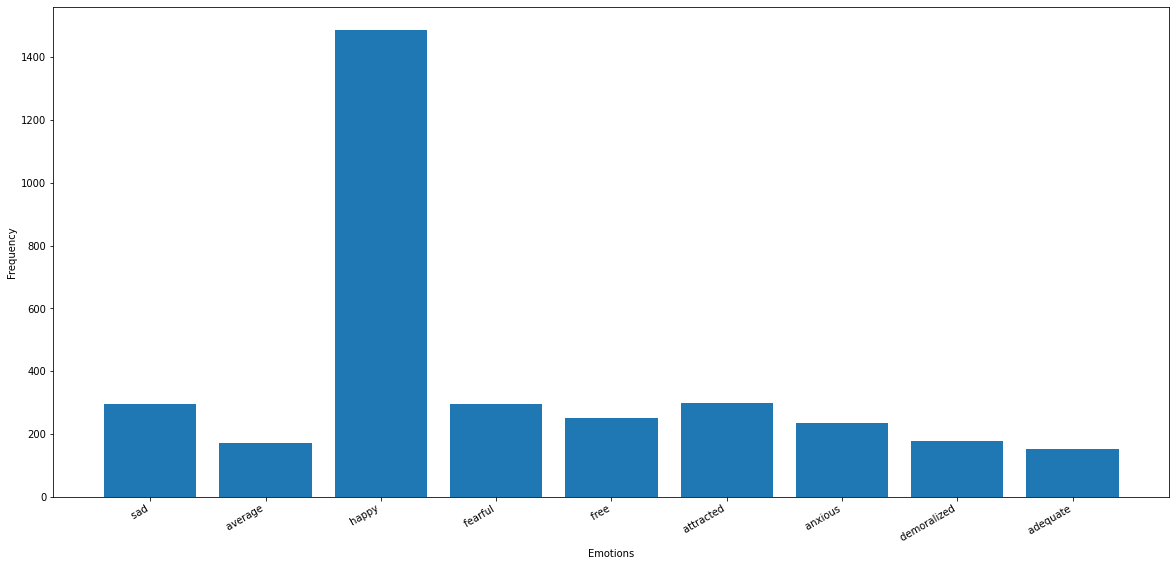

In [101]:
# turn the emotion list into dictionary 
words_score_dict = dict(Counter(temp_emotion_list))

# now for just the emotions with freq >150
more_than_150_emotions = dict( (key, value) for (key, value) in words_score_dict.items() if value > 150 )


fig, ax = plt.subplots()
# ax.bar(words_score_dict.keys(), words_score_dict.values()) 
ax.bar(more_than_150_emotions.keys(), more_than_150_emotions.values())

# fit the text under the graph 
fig.autofmt_xdate()

# change the dimensions of the plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Emotions')
plt.ylabel('Frequency')

#save the graph and show it 
plt.savefig(file_path + "/Output_Files/EmotionsGraph.png", format="png", dpi=800)
# plt.show()

Wordcloud of most popular emotions expressed by customers

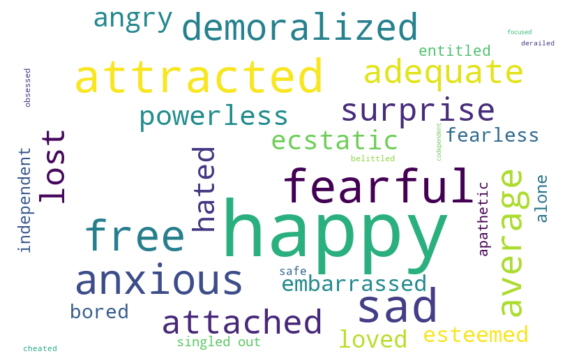

In [102]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(words_score_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
# plt.show()
wordcloud.to_file(file_path + "/Output_Files/Emotions_WordCloud.png")

Bar Graph of most popular topics raised by customers

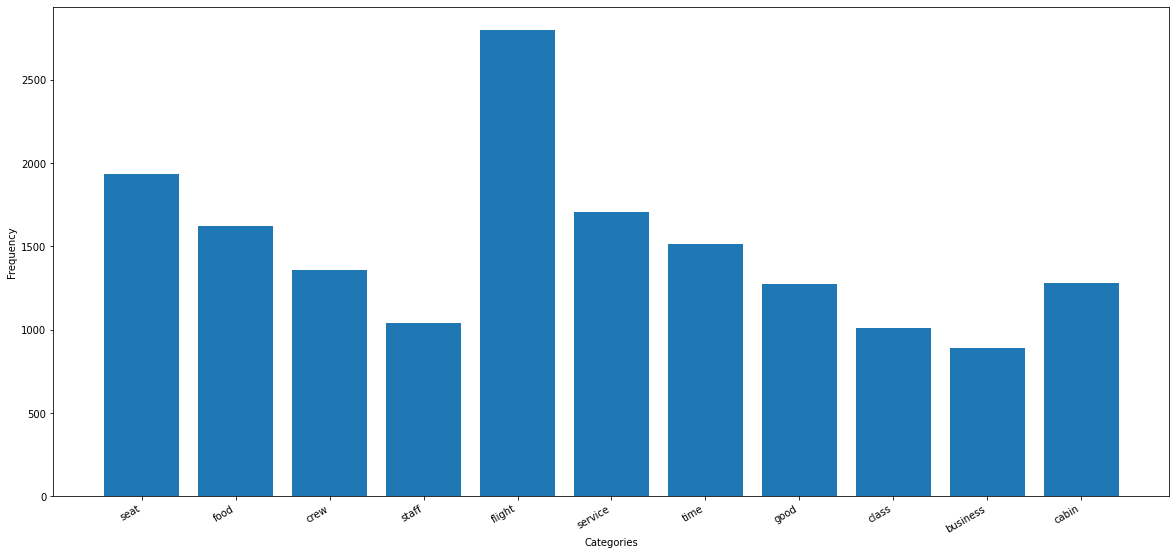

In [103]:
# turn the emotion list into dictionary 
cat_score_dict = dict(Counter(temp_category_list))

# now for just the emotions with freq >10
more_than_10_cat = dict( (key, value) for (key, value) in cat_score_dict.items() if value > 10 )


fig, ax = plt.subplots()
ax.bar(more_than_10_cat.keys(), more_than_10_cat.values())

# fit the text under the graph 
fig.autofmt_xdate()

# change the dimensions of the plot 
fig.set_figwidth(20)
fig.set_figheight(10)

# label the plot 
plt.xlabel('Categories')
plt.ylabel('Frequency')

#save the graph and show it 
plt.savefig(file_path + "/Output_Files/TopicsGraph.png", format="png", dpi=800)
# plt.show()


Wordcloud of most popular topics raised by customers

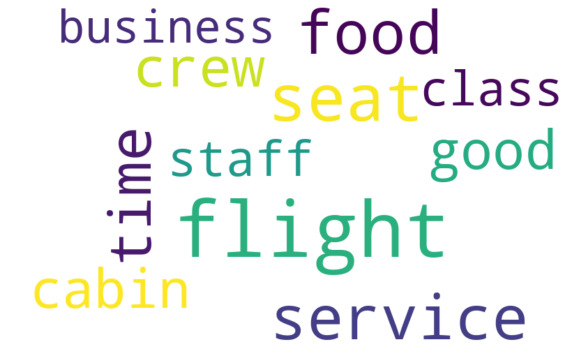

In [104]:
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(cat_score_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
# plt.show()

wordcloud.to_file(file_path + "/Output_Files/Topics_WordCloud.png")